In [60]:
import numpy as np
import pandas as pd

In [61]:
#删除缺失数据

In [62]:
#读取数据，将空值形式的缺失值转换为可识别的类型
data = pd.read_csv('WorldIndex.csv',encoding='GBK')

In [63]:
#用NaN代替空值
data = data.replace(' ',np.NaN)
print(data.columns)#['Country','Continent','Life_expectancy','GDP_per_capita','Population']

Index(['Country', 'Continent', 'Life_expectancy', 'GDP_per_capita',
       'Population'],
      dtype='object')


In [64]:
#将每列的缺失值个数统计出来
#isnull函数检查数据是否有缺失返回布尔值，元素为空或者NaN返回Ture，否则就是False
#data.isnull().sum()返回每列缺失值的数量
null_all = data.isnull().sum()
null_all

Country            0
Continent          0
Life_expectancy    8
GDP_per_capita     8
Population         1
dtype: int64

In [65]:
new_drop = data.dropna(axis=0)#（178*5）
print(new_drop.shape)
#dropna()默认axis=0，删除带有空值的行（只要有一个就删除整行），axis=1删除带有空值的列

(164, 5)


In [66]:
import csv
import matplotlib
import matplotlib.pyplot as plt

In [67]:
#人均寿命数据的直方图

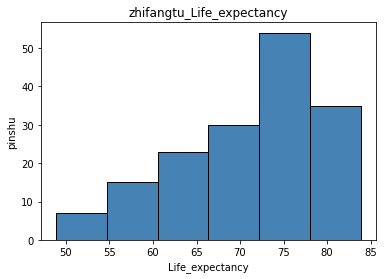

In [68]:
plt.hist(x = new_drop.Life_expectancy, # 指定绘图数据
         bins = 6, # 指定直方图中条块的个数
          color = 'steelblue', # 指定直方图的填充色
          edgecolor = 'black' # 指定直方图的边框色
          )
# 添加x轴和y轴标签
plt.xlabel('Life_expectancy')
plt.ylabel('pinshu')
# 添加标题
plt.title('zhifangtu_Life_expectancy')
# 显示图形
plt.show()

In [69]:
#人均GDP直方图

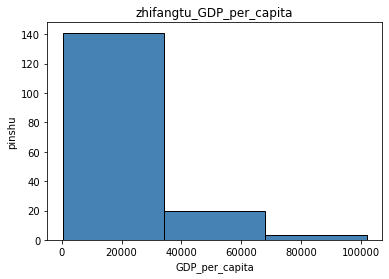

In [70]:
plt.hist(x = new_drop.GDP_per_capita, # 指定绘图数据
         bins = 3, # 指定直方图中条块的个数
          color = 'steelblue', # 指定直方图的填充色
          edgecolor = 'black' # 指定直方图的边框色
          )
# 添加x轴和y轴标签
plt.xlabel('GDP_per_capita')
plt.ylabel('pinshu')
# 添加标题
plt.title('zhifangtu_GDP_per_capita')
# 显示图形
plt.show()

In [71]:
#人均寿命箱线图

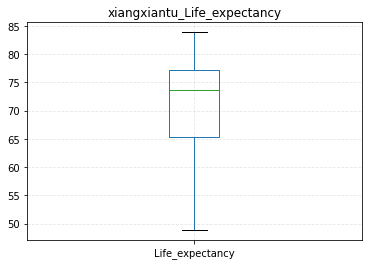

In [72]:
df = pd.DataFrame(new_drop.Life_expectancy)
df.plot.box(title="xiangxiantu_Life_expectancy")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

In [73]:
#绘制每个大洲的国家个数条形图

In [74]:
a=new_drop['Continent'].value_counts()
a

Africa           48
Europe           41
Asia             36
North America    19
South America    11
Oceania           9
Name: Continent, dtype: int64

In [75]:
continent=list(new_drop['Continent'].unique())
continent_n=np.arange(len(continent))
continent_n

array([0, 1, 2, 3, 4, 5])

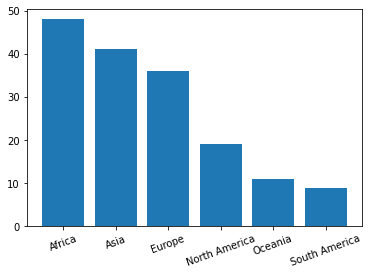

In [76]:
plt.bar(continent_n, a)
plt.xticks(continent_n, continent,rotation=20)
plt.show()

In [77]:
#绘制每个大洲的国家数量占比的饼图

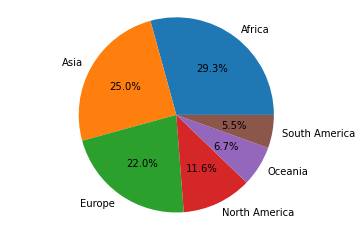

In [78]:
plt.pie(a, labels=continent, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

In [79]:
#绘制人均寿命和人均GDP的关系（散点）

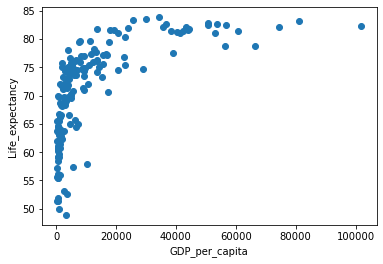

In [80]:
plt.scatter(new_drop.GDP_per_capita, new_drop.Life_expectancy)
plt.xlabel('GDP_per_capita')
plt.ylabel('Life_expectancy')
plt.show()

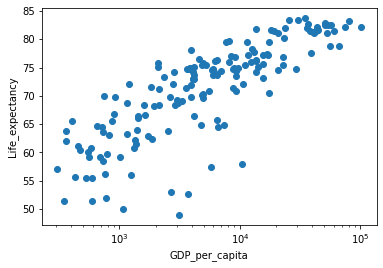

In [81]:
plt.scatter(new_drop.GDP_per_capita, new_drop.Life_expectancy)
plt.xlabel('GDP_per_capita')
plt.ylabel('Life_expectancy')
plt.xscale('log')
plt.show()

In [82]:
#人均寿命和人均GDP的气泡图（数据点大小，正比于人口数，给不同洲的国家设置不同的颜色）

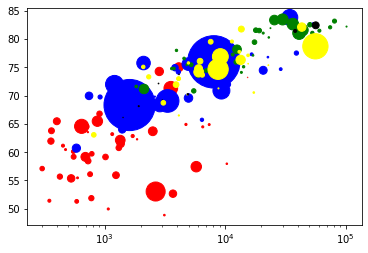

In [83]:
map_dict = {      
    'Asia':'blue',
    'Europe':'green',
    'Africa':'red',
    'North America':'yellow',
    'South America':'yellow',
    'Oceania':'black'
}
colors = new_drop.Continent.map(map_dict)  
size = new_drop.Population / 1e6 * 2
plt.scatter(new_drop.GDP_per_capita, new_drop.Life_expectancy, c=colors,s=size, marker="o")
plt.xscale('log')
plt.show()